# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Salsabila Rachmayani
- **Email:** salsabilarachmayani@gmail.com
- **ID Dicoding:** salsaarachmayani

## Menentukan Pertanyaan Bisnis

- Bagaimana cuaca mempengaruhi jumlah sewa sepeda harian pada tahun 2011 dan 2012?
- Bagaimana pengaruh musim terhadap jumlah sewa sepeda harian pada tahun 2011 dan 2012?


## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install streamlit

In [39]:
%%writefile app.py

Writing app.py


In [45]:
! wget -q -O - ipv4.icanhazip.com

34.32.231.46


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501

## Data Wrangling

### Gathering Data

Membaca file data day.csv dan menampilkan 5 baris pertama di day_df

In [3]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Membaca file data hour.csv dan menampilkan 5 baris pertama di hour_df

In [4]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
print("Jumlah baris di DataFrame day : ", day_df.shape[0])
print("Jumlah baris di DataFrame hour : ", hour_df.shape[0])

Jumlah baris di DataFrame day :  731
Jumlah baris di DataFrame hour :  17379


### Assessing Data

Menampilkan info dari day_df

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
print("Jumlah duplikasi : ", day_df.duplicated().sum())

Jumlah duplikasi :  0


Tidak ada data duplikasi pada day_df

In [8]:
print("Jumlah missing value day : " , day_df.isna().sum())

Jumlah missing value day :  instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Tidak ada missing value pada day_df

In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menampilkan info dari hour_df

In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
print("Jumlah duplikasi : ", hour_df.duplicated().sum())

Jumlah duplikasi :  0


Tidak ada data yang terduplikasi di hour_df

In [12]:
print("Jumlah missing value hour : ", hour_df.isna().sum())

Jumlah missing value hour :  instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Tidak ada missing value di hour_df

In [13]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Mengganti tipe data dteday menjadi datetime dan tipe data season, month, holiday, weekday, workingday, weathersit menjadi category

In [14]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df['season'] = day_df.season.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')

Mengganti output data season, tahun, month, dan weathersit

In [15]:
# 1:Winter, 2:Spring, 3:Summer, 4:Fall
day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
# 0:2011, 1:2012
day_df.yr.replace((0,1), (2011,2012), inplace=True)
# 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
day_df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
# 1:Clear, 2:Cloudy, 3:Light snow, 4:Heavy rain
day_df.weathersit.replace((1,2,3,4),("Clear", "Cloudy", "Light snow", "Heavy rain"), inplace=True)

In [16]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(6), datetime64

In [17]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,6,0,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,0,0,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,1,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,2,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,3,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengganti tipe data dteday menjadi datetime dan tipe data season, month, holiday, weekday, workingday, weathersit menjadi category

In [18]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df['season'] = hour_df.season.astype('category')
hour_df['mnth'] = hour_df.mnth.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
hour_df['weathersit'] = hour_df.weathersit.astype('category')

Mengganti output data season, tahun, month, dan weathersit

In [19]:
# 1:Winter, 2:Spring, 3:Summer, 4:Fall
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
# 0:2011, 1:2012
hour_df.yr.replace((0,1), (2011,2012), inplace=True)
# 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
hour_df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
# 1:Clear, 2:Cloudy, 3:Light snow, 4:Heavy rain
hour_df.weathersit.replace((1,2,3,4),("Clear", "Cloudy", "Light snow", "Heavy rain"), inplace=True)

In [20]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [21]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,0,6,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,6,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,6,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,6,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,6,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore Data

In [22]:
day_df.groupby(by="season").agg({
    "workingday" : "count",
    "windspeed" : ["max", "min", "mean", "std"]
})

workingday windspeed                              
            count       max       min      mean       std
season                                                   
Spring        181  0.507463  0.045408  0.214537  0.086439
Summer        184  0.388067  0.065929  0.203507  0.071629
Fall          188  0.375617  0.064071  0.172095  0.059526
Winter        178  0.422275  0.022392  0.171995  0.081565

In [23]:
hour_df.groupby(by="season").agg({
    "workingday" : "count",
    "windspeed" : ["max", "min", "mean", "std"]
})

workingday windspeed                         
            count       max  min      mean       std
season                                              
Spring       4242    0.8060  0.0  0.215107  0.136914
Summer       4409    0.7164  0.0  0.203410  0.117368
Fall         4496    0.8507  0.0  0.171593  0.109354
Winter       4232    0.6418  0.0  0.170819  0.118666

In [34]:
hour_df.groupby(by="season").agg({
    "temp" : "count",
    "windspeed" : ["max", "min", "mean", "std"]
})

temp windspeed                         
       count       max  min      mean       std
season                                         
Spring  4242    0.8060  0.0  0.215107  0.136914
Summer  4409    0.7164  0.0  0.203410  0.117368
Fall    4496    0.8507  0.0  0.171593  0.109354
Winter  4232    0.6418  0.0  0.170819  0.118666

In [ ]:
day_df.groupby(by="season").cnt.nunique().sort_values(ascending=False)

season
Fall      188
Summer    182
Spring    179
Winter    176
Name: cnt, dtype: int64

In [ ]:
day_df.groupby(by="season").instant.nunique().sort_values(ascending=False)

season
Fall      188
Summer    184
Spring    181
Winter    178
Name: instant, dtype: int64

In [25]:
day_df.groupby(by="weathersit").cnt.nunique().sort_values(ascending=False)

weathersit
Clear         451
Cloudy        243
Light snow     21
Name: cnt, dtype: int64

In [ ]:
day_df.groupby(by="holiday").cnt.nunique().sort_values(ascending=False)

holiday
0    679
1     20
Name: cnt, dtype: int64

In [ ]:
day_df.groupby(by="yr").cnt.nunique().sort_values(ascending=False)

yr
2012    356
2011    352
Name: cnt, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana cuaca mempengaruhi jumlah sewa sepeda harian pada tahun 2011 dan 2012?

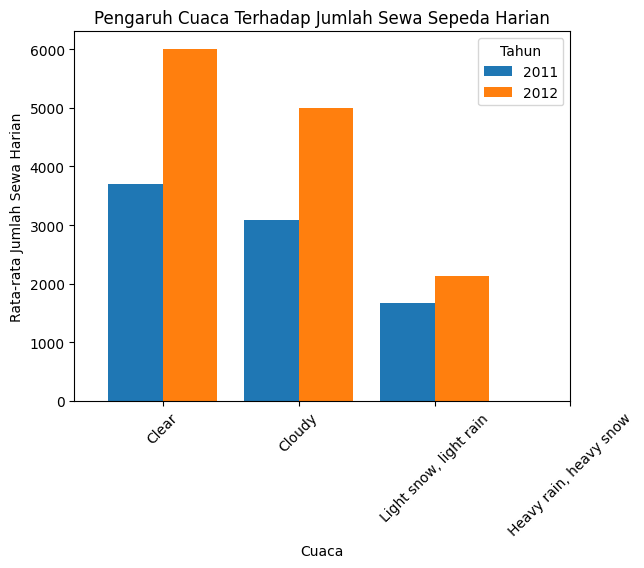

In [33]:

data = day_df.groupby(['weathersit', 'yr'])['cnt'].mean().unstack()
weather_sit = ['Clear', 'Cloudy', 'Light snow, light rain', 'Heavy rain, heavy snow']
data.plot(kind='bar', width=0.8)
plt.xlabel('Cuaca')
plt.ylabel('Rata-rata Jumlah Sewa Harian')
plt.title('Pengaruh Cuaca Terhadap Jumlah Sewa Sepeda Harian')
plt.xticks(range(len(weather_sit)), weather_sit, rotation=45)
plt.legend(title='Tahun')

plt.show()

### Pertanyaan 2: Bagaimana pengaruh musim terhadap jumlah sewa sepeda harian pada tahun 2011 dan 2012?


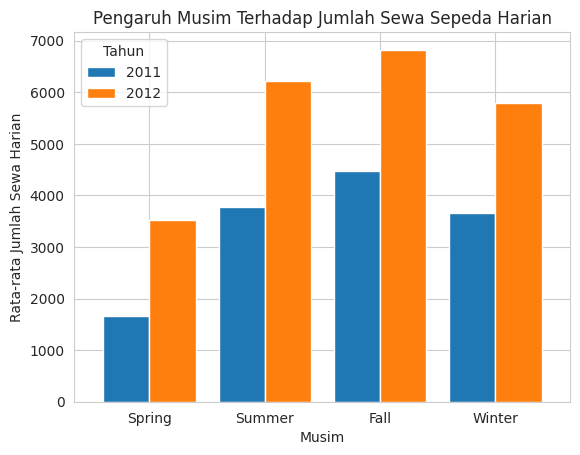

In [ ]:
data = day_df.groupby(['season', 'yr'])['cnt'].mean().unstack()
season_names = ['Spring', 'Summer', 'Fall', 'Winter']
data.plot(kind='bar', width=0.8)
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Sewa Harian')
plt.title('Pengaruh Musim Terhadap Jumlah Sewa Sepeda Harian')
plt.xticks(range(len(season_names)), season_names, rotation=360)
plt.legend(title='Tahun')

plt.show()

## Conclusion

- Conclution pertanyaan 1 yaitu Bagaimana cuaca mempengaruhi jumlah sewa sepeda harian setiap tahunnya? Dari grafik diatas dapat disimpulkan bahwa saat cuaca sedang cerah (clear) jumlah sewa sepeda lebih banyak dibandingkan dengan cuaca lainnya. Hal ini dapat disebabkan karena cuaca cerah sangat pas untuk bersepeda oleh karena itu ketika cuaca sedang hujan atau bersalju jumlah sewa sepeda menurun.

- Conclution pertanyaan 2 yaitu Bagaimana pengaruh musim terhadap jumlah sewa sepeda harian setiap tahunnya?
 Dari grafik diatas dapat disimpulkan bahwa musim mempengaruhi jumlah sewa sepeda harian. Musim gugur memiliki jumlah sewa sepeda yang paling banyak dibandingkan dengan jumlah sewa sepeda di musim lainnya. Hal ini dapat disebabkan karena ketika musim gugur suhu udaranya tidak terlalu dingin juga tidak terlalu panas serta tidak ada halangan seperti salju.

In [35]:
day_df.to_csv("bike_sharing.csv", index=False)

In [36]:
hour_df.to_csv("bike_hour.csv", index=False)